In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,584 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 당뇨병 데이터셋 로드
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=26)

# 선형 회귀

In [ ]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train, y_train)

print('학습 점수 :', linear_reg.score(X_train, y_train))
print('테스트 점수 :', linear_reg.score(X_test, y_test))

학습 점수 : 0.5318534159896156
테스트 점수 : 0.45263268696241277


# 릿지 회귀

In [ ]:
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

print('학습 점수 :', ridge.score(X_train, y_train))
print('테스트 점수 :', ridge.score(X_test, y_test))

학습 점수 : 0.4438122666960367
테스트 점수 : 0.39725602612955124


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


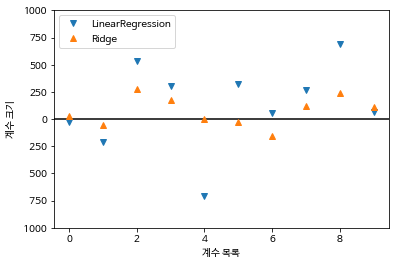

In [ ]:
# 선형 회귀와 릿지 회귀 비교
plt.plot(linear_reg.coef_, 'v', label = 'LinearRegression')
plt.plot(ridge.coef_, '^', label = 'Ridge')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-1000, 1000)
plt.legend()

In [ ]:
# 릿지 회귀(규제)
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('Ridge')
print('학습 점수 :', ridge.score(X_train, y_train))
print('테스트 점수 :', ridge.score(X_test, y_test))

print()
print('Ridge0.1')
print('학습 점수 :', ridge01.score(X_train, y_train))
print('테스트 점수 :', ridge01.score(X_test, y_test))

print()
print('Ridge10')
print('학습 점수 :', ridge10.score(X_train, y_train))
print('테스트 점수 :', ridge10.score(X_test, y_test))

Ridge
학습 점수 : 0.4438122666960367
테스트 점수 : 0.39725602612955124

Ridge0.1
학습 점수 : 0.5261639554478674
테스트 점수 : 0.4511693877119213

Ridge10
학습 점수 : 0.16285530859616648
테스트 점수 : 0.14818620082918377


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


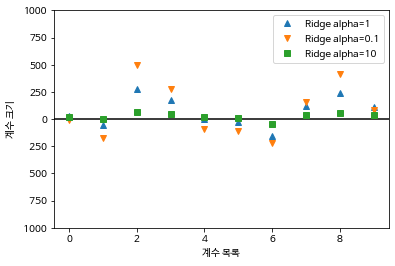

In [ ]:
# 릿지 회귀 규제간의 비교
plt.plot(ridge.coef_, '^', label = 'Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label = 'Ridge alpha=0.1')
plt.plot(ridge10.coef_, 's', label = 'Ridge alpha=10')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-1000, 1000)
plt.legend()

# 라쏘 회귀

In [ ]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
lasso10 = Lasso(alpha=10).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)

print('Lasso')
print('학습 점수 :', lasso.score(X_train, y_train))
print('테스트 점수 :', lasso.score(X_test, y_test))
print('사용 특성 개수 :', np.sum(lasso.coef_ != 0))

print()
print('Lasso10')
print('학습 점수 :', lasso10.score(X_train, y_train))
print('테스트 점수 :', lasso10.score(X_test, y_test))
print('사용 특성 개수 :', np.sum(lasso10.coef_ != 0))

print()
print('Lasso0.01')
print('학습 점수 :', lasso001.score(X_train, y_train))
print('테스트 점수 :', lasso001.score(X_test, y_test))
print('사용 특성 개수 :', np.sum(lasso001.coef_ != 0))

print()
print('Lasso0.0001')
print('학습 점수 :', lasso00001.score(X_train, y_train))
print('테스트 점수 :', lasso00001.score(X_test, y_test))
print('사용 특성 개수 :', np.sum(lasso00001.coef_ != 0))

Lasso
학습 점수 : 0.3728000602757743
테스트 점수 : 0.3433814928374479
사용 특성 개수 : 2

Lasso10
학습 점수 : 0.0
테스트 점수 : -0.004179948808548328
사용 특성 개수 : 0

Lasso0.01
학습 점수 : 0.5306191095820931
테스트 점수 : 0.4502435019299066
사용 특성 개수 : 9

Lasso0.0001
학습 점수 : 0.5318531037843632
테스트 점수 : 0.4526045191274204
사용 특성 개수 : 10


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


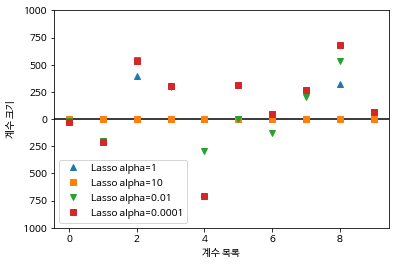

In [ ]:
plt.plot(lasso.coef_, '^', label = 'Lasso alpha=1')
plt.plot(lasso10.coef_, 's', label = 'Lasso alpha=10')
plt.plot(lasso001.coef_, 'v', label = 'Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 's', label = 'Lasso alpha=0.0001')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-1000, 1000)
plt.legend()

# 로지스틱 회귀

In [2]:
# 유방암 데이터셋 로드
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=26)

In [23]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=50000).fit(X_train, y_train)
logreg100 = LogisticRegression(C=100, max_iter=50000).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.01, max_iter=50000).fit(X_train, y_train)

print('LogisticRegression')
print('학습 점수:',logreg.score(X_train, y_train))
print('테스트 점수:',logreg.score(X_test, y_test))

print()
print('LogisticRegression100')
print('학습 점수:',logreg100.score(X_train, y_train))
print('테스트 점수:',logreg100.score(X_test, y_test))

print()
print('LogisticRegression001')
print('학습 점수:', logreg001.score(X_train, y_train))
print('테스트 점수:', logreg001.score(X_test, y_test))

LogisticRegression
학습 점수: 0.9624413145539906
테스트 점수: 0.9440559440559441

LogisticRegression100
학습 점수: 0.9859154929577465
테스트 점수: 0.958041958041958

LogisticRegression001
학습 점수: 0.9577464788732394
테스트 점수: 0.9370629370629371


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


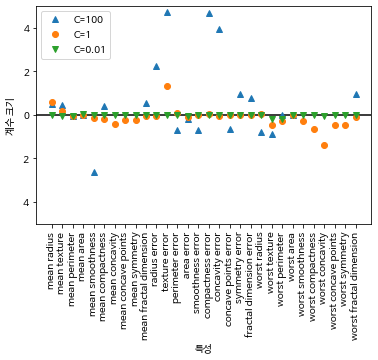

In [24]:
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

plt.xlabel('특성')
plt.ylabel('계수 크기')

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.legend()

In [25]:
logreg = LogisticRegression(solver='liblinear', penalty='l1', max_iter=50000).fit(X_train, y_train)
logreg100 = LogisticRegression(solver='liblinear', C=100, penalty='l1', max_iter=50000).fit(X_train, y_train)
logreg001 = LogisticRegression(solver='liblinear', C=0.01, penalty='l1', max_iter=50000).fit(X_train, y_train)

print('LogisticRegression (L1사용)')
print('학습 점수:',logreg.score(X_train, y_train))
print('테스트 점수:',logreg.score(X_test, y_test))

print()
print('LogisticRegression100 (L1사용)')
print('학습 점수:',logreg100.score(X_train, y_train))
print('테스트 점수:',logreg100.score(X_test, y_test))

print()
print('LogisticRegression001 (L1사용)')
print('학습 점수:', logreg001.score(X_train, y_train))
print('테스트 점수:', logreg001.score(X_test, y_test))

LogisticRegression (L1사용)
학습 점수: 0.9647887323943662
테스트 점수: 0.9440559440559441

LogisticRegression100 (L1사용)
학습 점수: 0.9953051643192489
테스트 점수: 0.958041958041958

LogisticRegression001 (L1사용)
학습 점수: 0.9248826291079812
테스트 점수: 0.9020979020979021


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


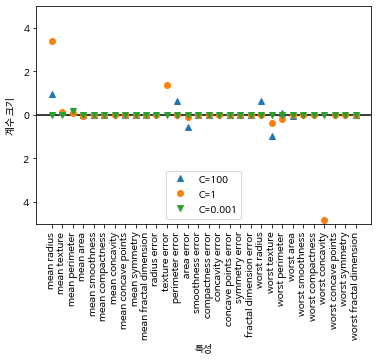

In [11]:
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

plt.xlabel('특성')
plt.ylabel('계수 크기')

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.legend()